# <center>Analysis of How the Number of Hypergames Affects Performance</center>

This file is an interactive notebook to analyze the data obtained from tests.
It focuses on examining what happens when the maximum number of hypergames held increases with the number of simulations and number of branches held constant.

NumProbes = 4<br>
NumBranches = 25 (> branching factor for kriegTTT_4x4)

## Reading in the Data

First the match data must be read in.

In [51]:
import pandas as pd
import matplotlib.pyplot as plt
import numpy as np
import math
import statistics
np.random.seed(42)

# Read in the csv files
numHypergames_count = [50, 30, 16, 8, 4, 2, 1]
numNames = ['numHyperGames_50', 'numHyperGames_30', 'numHyperGames_16', 'numHyperGames_8', 'numHyperGames_4', 'numHyperGames_2', 'numHyperGames_1']
data = list()

for idx, name in enumerate(numNames):
    file_name = 'testOutput/kriegTTT_4x4/numHyperGames/' + name + '/testOutput.csv'
    data.append(pd.DataFrame)
    data[idx] = pd.read_csv(file_name, header=0)

# Print the first 5 rows of the data
for game in data:
    display(game.head())

,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_0,kriegTTT_4x4,2,1590639178669,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_1,kriegTTT_4x4,2,1590639195989,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_2,kriegTTT_4x4,2,1590639212389,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_3,kriegTTT_4x4,2,1590639237909,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_4,kriegTTT_4x4,2,1590639254668,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_0,kriegTTT_4x4,2,1590641505399,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_1,kriegTTT_4x4,2,1590641524231,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_3,kriegTTT_4x4,2,1590641910294,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_4,kriegTTT_4x4,2,1590641926492,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_5,kriegTTT_4x4,2,1590641968549,10,300,XPLAYER,7,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numHypergames16_0,kriegTTT_4x4,2,1590643859597,10,300,XPLAYER,6,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numHypergames16_1,kriegTTT_4x4,2,1590643869300,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numHypergames16_2,kriegTTT_4x4,2,1590643881538,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numHypergames16_3,kriegTTT_4x4,2,1590643890913,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numHypergames16_5,kriegTTT_4x4,2,1590644276139,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numHypergames8_0,kriegTTT_4x4,2,1590645100582,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numHypergames8_1,kriegTTT_4x4,2,1590645109837,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numHypergames8_2,kriegTTT_4x4,2,1590645117963,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numHypergames8_3,kriegTTT_4x4,2,1590645126834,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numHypergames8_4,kriegTTT_4x4,2,1590645133004,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numHypergames4_0,kriegTTT_4x4,2,1590647228837,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numHypergames4_1,kriegTTT_4x4,2,1590647233588,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numHypergames4_2,kriegTTT_4x4,2,1590647238208,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numHypergames4_3,kriegTTT_4x4,2,1590647247077,10,300,XPLAYER,6,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numHypergames4_4,kriegTTT_4x4,2,1590647251858,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numHypergames2_0,kriegTTT_4x4,2,1590651248841,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numHypergames2_1,kriegTTT_4x4,2,1590651255165,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numHypergames2_3,kriegTTT_4x4,2,1590651669281,10,300,XPLAYER,3,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numHypergames2_4,kriegTTT_4x4,2,1590651689797,10,300,XPLAYER,10,xplayer,HYPER,0,oplayer,IMPRANDOM,100
4,hypertest_numHypergames2_5,kriegTTT_4x4,2,1590651693261,10,300,XPLAYER,3,xplayer,HYPER,0,oplayer,IMPRANDOM,100


,match_id,game_name,gdl_version,timestamp,startclock,playclock,sight_of,num_steps,role_1,player_1,player_1_score,role_2,player_2,player_2_score
0,hypertest_numHypergames1_0,kriegTTT_4x4,2,1590653489600,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
1,hypertest_numHypergames1_1,kriegTTT_4x4,2,1590653493865,10,300,XPLAYER,5,xplayer,HYPER,100,oplayer,IMPRANDOM,0
2,hypertest_numHypergames1_2,kriegTTT_4x4,2,1590653803224,10,300,XPLAYER,11,xplayer,HYPER,100,oplayer,IMPRANDOM,0
3,hypertest_numHypergames1_3,kriegTTT_4x4,2,1590653854735,10,300,XPLAYER,4,xplayer,HYPER,100,oplayer,IMPRANDOM,0
4,hypertest_numHypergames1_4,kriegTTT_4x4,2,1590653861936,10,300,XPLAYER,6,xplayer,HYPER,100,oplayer,IMPRANDOM,100


Next, the move data should be read in for each match

*Note: time_to_update and time_to_select_move are in milliseconds*

In [52]:
move_list_games = list()
for idx, name in enumerate(numNames):
    file_name_prefix = 'testOutput/kriegTTT_4x4/numHyperGames/' + name + '/moveset/'
    temp_move_list = list()
    for match_name in data[idx]['match_id']:
        file_name = file_name_prefix + match_name + '.csv'
        temp_move_list.append(pd.read_csv(file_name, header=0))
    move_list_games.append(temp_move_list)

# Verify by printing the head of the first game
for move_list in move_list_games:
    display(move_list[0])

,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,1,0,(MARK 3 4 )
1,hypertest_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,0,543,(MARK 3 4 )
2,hypertest_0,kriegTTT_4x4,1,OPLAYER,imprandom,1,4,18,0,(MARK 4 2 )
3,hypertest_0,kriegTTT_4x4,1,XPLAYER,hyper,1,4,19,411,(MARK 1 2 )
4,hypertest_0,kriegTTT_4x4,2,OPLAYER,imprandom,14,4,21,0,(MARK 4 3 )
5,hypertest_0,kriegTTT_4x4,2,XPLAYER,hyper,14,4,21,4029,(MARK 3 1 )
6,hypertest_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,41,0,(MARK 3 4 )
7,hypertest_0,kriegTTT_4x4,3,XPLAYER,hyper,50,4,41,12159,(MARK 2 1 )
8,hypertest_0,kriegTTT_4x4,4,OPLAYER,imprandom,50,4,60,0,(MARK 3 3 )
9,hypertest_0,kriegTTT_4x4,4,XPLAYER,hyper,50,4,159,7705,(MARK 4 1 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,0,0,(MARK 3 1 )
1,hypertest_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,0,503,(MARK 1 4 )
2,hypertest_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,20,0,(MARK 3 4 )
3,hypertest_0,kriegTTT_4x4,1,XPLAYER,hyper,15,4,20,4409,(MARK 2 3 )
4,hypertest_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,39,0,(MARK 4 4 )
5,hypertest_0,kriegTTT_4x4,2,XPLAYER,hyper,30,4,31,6928,(MARK 2 2 )
6,hypertest_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,151,0,(MARK 1 2 )
7,hypertest_0,kriegTTT_4x4,3,XPLAYER,hyper,30,4,140,5060,(MARK 2 1 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numHypergames16_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,0,0,(MARK 4 2 )
1,hypertest_numHypergames16_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,0,579,(MARK 1 1 )
2,hypertest_numHypergames16_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,15,0,(MARK 2 2 )
3,hypertest_numHypergames16_0,kriegTTT_4x4,1,XPLAYER,hyper,15,4,15,4693,(MARK 2 2 )
4,hypertest_numHypergames16_0,kriegTTT_4x4,2,OPLAYER,imprandom,29,4,122,0,(MARK 1 4 )
5,hypertest_numHypergames16_0,kriegTTT_4x4,2,XPLAYER,hyper,16,4,69,4280,(MARK 2 3 )
6,hypertest_numHypergames16_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,47,0,(MARK 2 1 )
7,hypertest_numHypergames16_0,kriegTTT_4x4,3,XPLAYER,hyper,16,4,16,3694,(MARK 1 3 )
8,hypertest_numHypergames16_0,kriegTTT_4x4,4,OPLAYER,imprandom,50,4,232,0,(MARK 1 2 )
9,hypertest_numHypergames16_0,kriegTTT_4x4,4,XPLAYER,hyper,16,4,185,2259,(MARK 1 2 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numHypergames8_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,4,0,(MARK 1 1 )
1,hypertest_numHypergames8_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,4,476,(MARK 2 2 )
2,hypertest_numHypergames8_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,20,0,(MARK 3 3 )
3,hypertest_numHypergames8_0,kriegTTT_4x4,1,XPLAYER,hyper,8,4,10,2487,(MARK 2 3 )
4,hypertest_numHypergames8_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,38,0,(MARK 2 2 )
5,hypertest_numHypergames8_0,kriegTTT_4x4,2,XPLAYER,hyper,8,4,4,1425,(MARK 2 4 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numHypergames4_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,0,0,(MARK 3 4 )
1,hypertest_numHypergames4_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,1,499,(MARK 4 3 )
2,hypertest_numHypergames4_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,21,0,(MARK 4 3 )
3,hypertest_numHypergames4_0,kriegTTT_4x4,1,XPLAYER,hyper,4,4,4,1286,(MARK 3 3 )
4,hypertest_numHypergames4_0,kriegTTT_4x4,2,OPLAYER,imprandom,29,4,126,0,(MARK 3 2 )
5,hypertest_numHypergames4_0,kriegTTT_4x4,2,XPLAYER,hyper,4,4,10,791,(MARK 2 3 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numHypergames2_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,6,0,(MARK 3 1 )
1,hypertest_numHypergames2_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,6,515,(MARK 2 2 )
2,hypertest_numHypergames2_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,21,0,(MARK 1 2 )
3,hypertest_numHypergames2_0,kriegTTT_4x4,1,XPLAYER,hyper,2,4,0,676,(MARK 4 2 )
4,hypertest_numHypergames2_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,45,0,(MARK 4 2 )
5,hypertest_numHypergames2_0,kriegTTT_4x4,2,XPLAYER,hyper,2,4,0,399,(MARK 4 4 )
6,hypertest_numHypergames2_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,185,0,(MARK 4 4 )
7,hypertest_numHypergames2_0,kriegTTT_4x4,3,XPLAYER,hyper,2,4,0,299,(MARK 4 3 )


,match_id,game_name,step,role_name,player_name,count_hypergames,num_probes,time_to_update,time_to_select_move,move_chosen
0,hypertest_numHypergames1_0,kriegTTT_4x4,0,OPLAYER,imprandom,1,4,0,0,(MARK 2 4 )
1,hypertest_numHypergames1_0,kriegTTT_4x4,0,XPLAYER,hyper,1,4,0,545,(MARK 3 3 )
2,hypertest_numHypergames1_0,kriegTTT_4x4,1,OPLAYER,imprandom,15,4,17,0,(MARK 2 1 )
3,hypertest_numHypergames1_0,kriegTTT_4x4,1,XPLAYER,hyper,1,4,0,331,(MARK 4 4 )
4,hypertest_numHypergames1_0,kriegTTT_4x4,2,OPLAYER,imprandom,50,4,53,0,(MARK 2 2 )
5,hypertest_numHypergames1_0,kriegTTT_4x4,2,XPLAYER,hyper,1,4,0,313,(MARK 3 4 )
6,hypertest_numHypergames1_0,kriegTTT_4x4,3,XPLAYER,hyper,1,4,0,131,(MARK 2 4 )
7,hypertest_numHypergames1_0,kriegTTT_4x4,3,OPLAYER,imprandom,50,4,147,0,(MARK 1 2 )
8,hypertest_numHypergames1_0,kriegTTT_4x4,4,XPLAYER,hyper,1,4,0,131,(MARK 3 2 )
9,hypertest_numHypergames1_0,kriegTTT_4x4,4,OPLAYER,imprandom,50,4,1341,0,(MARK 4 3 )


## Analysis of Data

### Overall Agent Results

The average score of the agent will be calculated across all games

The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 50 hypergames is 91.84% for 49 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 30 hypergames is 91.49% for 47 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 16 hypergames is 93.88% for 49 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 8 hypergames is 83.33% for 48 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 4 hypergames is 86.96% for 46 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 2 hypergames is 80.85% for 47 games
The win/draw rate for the agent "HYPER" playing the game "kriegTTT_4x4" with 1 hypergames is 75.61% for 41 games


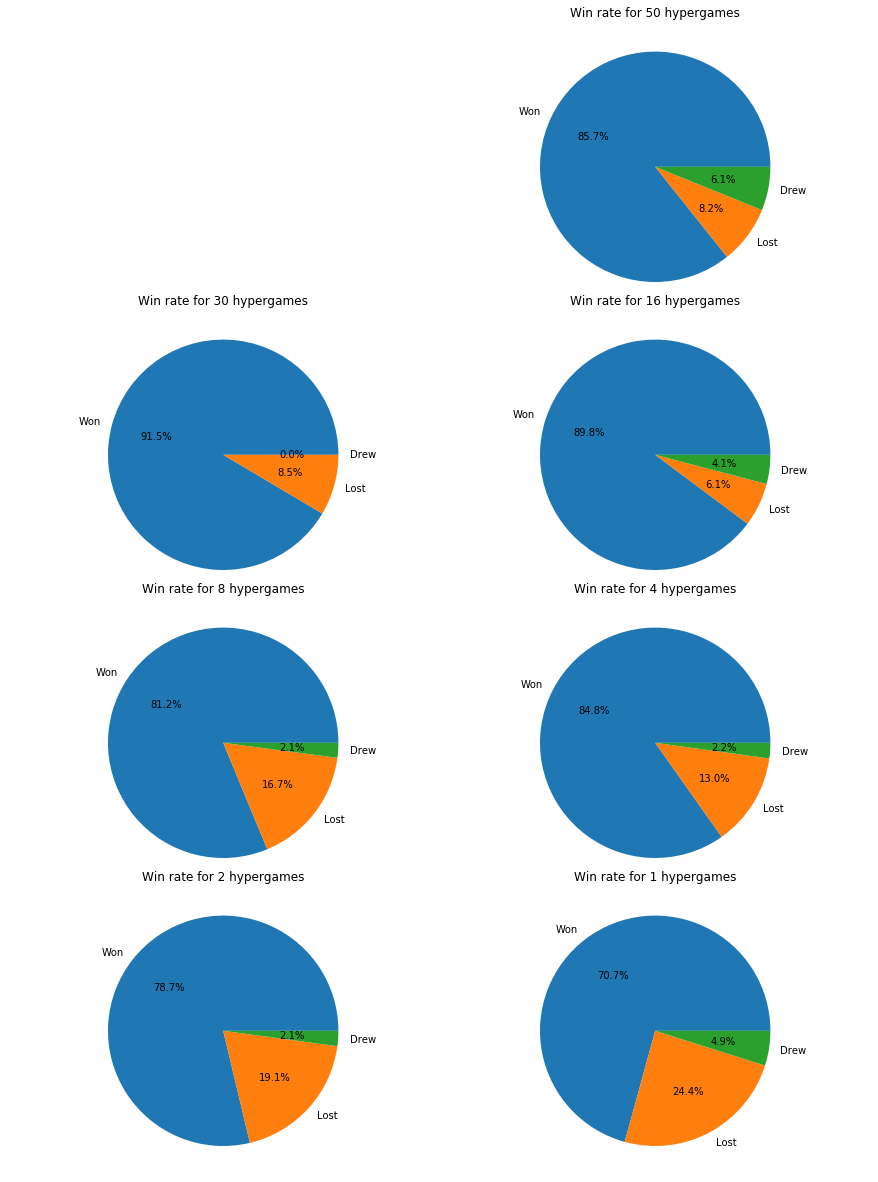

In [53]:
count_games_completed = list()
for idx, game in enumerate(data):
    total_score = data[idx]['player_1_score'].sum(skipna = True)
    total_count = len(data[idx]['player_1_score'])
    count_games_completed.append(total_count)
    print(f"The win/draw rate for the agent \"" + str(data[idx]['player_1'][0]) + "\" playing the game \"" + str(data[idx]['game_name'][0]) + "\" with " + str(numHypergames_count[idx]) + f" hypergames is {(total_score/total_count):.2f}% for " + str(total_count) + " games")

# Display a pie chart
fig = plt.figure()
data_len = len(data)
win_count = list()
for idx, game in enumerate(data):
    ax = fig.add_axes([(data_len - idx)%2,math.ceil((data_len - idx)/2),1,1])
    ax.axis('equal')
    ax.set_title('Win rate for ' + str(numHypergames_count[idx]) + ' hypergames')
    result = ['Won', 'Lost', 'Drew']
    game_count = [len(game[(game['player_1_score'] == 100) & (game['player_2_score'] == 0)]), len(game[(game['player_1_score'] == 0) & (game['player_2_score'] == 100)]), len(game[(game['player_1_score'] == 100) & (game['player_2_score'] == 100)])]
    win_count.append(game_count[0])
    ax.pie(game_count, labels = result,autopct='%1.1f%%')
plt.show()

It is now worth looking into how performance degrades with fewer hypergames allowed.

First I will consider the number of games that can be completed without error compared to the number of hypergames.

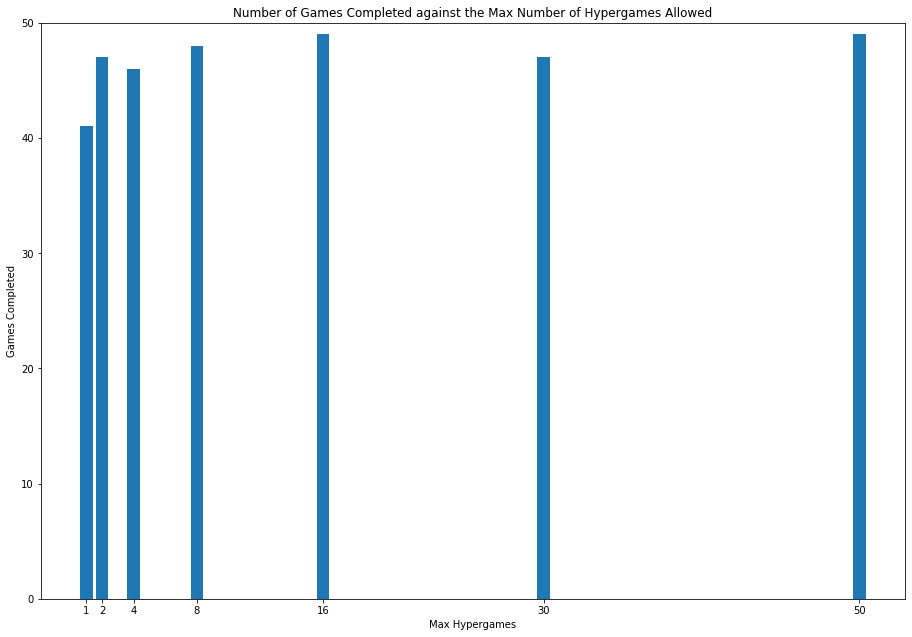

In [54]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2], label='state_update')
ax1.set_title('Number of Games Completed against the Max Number of Hypergames Allowed')
ax1.set_xlabel('Max Hypergames')
ax1.set_ylabel('Games Completed')
ax1.set_yscale('linear')
ax1.set_xticks(numHypergames_count)
ax1.set_ylim([0,50])
ax1.bar(numHypergames_count, count_games_completed)
plt.show()

I will now consider whether the number of games won

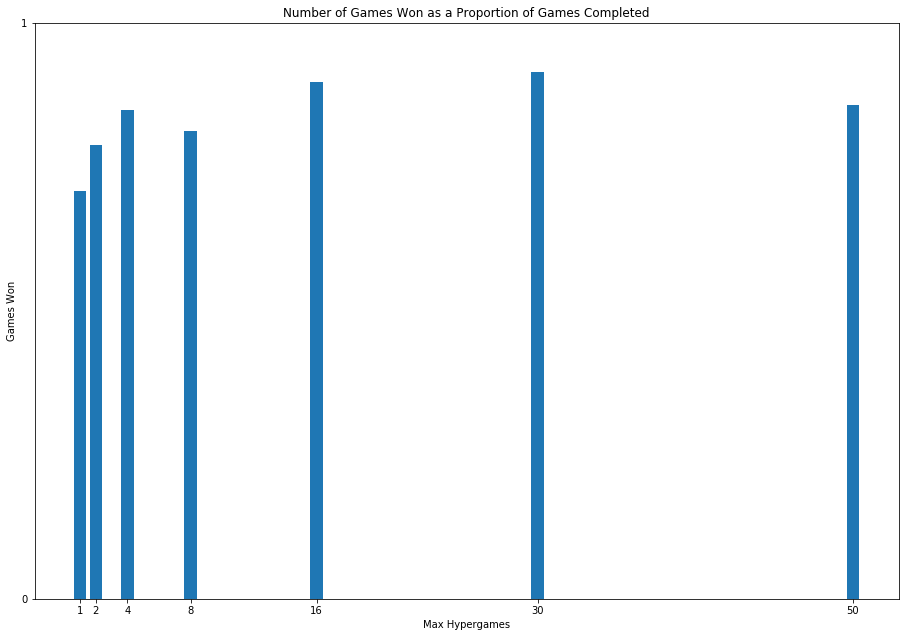

In [65]:
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Number of Games Won as a Proportion of Games Completed')
ax1.set_xlabel('Max Hypergames')
ax1.set_ylabel('Games Won')
ax1.set_yscale('linear')
ax1.set_xticks(numHypergames_count)
ax1.set_yticks(range(0,2,1))
ax1.set_ylim([0,1])
ax1.bar(numHypergames_count, np.divide(win_count,count_games_completed))
plt.show()

I will now consider the average time taken to win for various hypergames.

*Note: It is +1 because step increments from 0*

50 hypergames
	Mean steps to win: 3
	Median steps to win: 3.0
30 hypergames
	Mean steps to win: 3
	Median steps to win: 3
16 hypergames
	Mean steps to win: 3
	Median steps to win: 4.0
8 hypergames
	Mean steps to win: 3
	Median steps to win: 3
4 hypergames
	Mean steps to win: 3
	Median steps to win: 3
2 hypergames
	Mean steps to win: 4
	Median steps to win: 4
1 hypergames
	Mean steps to win: 5
	Median steps to win: 5


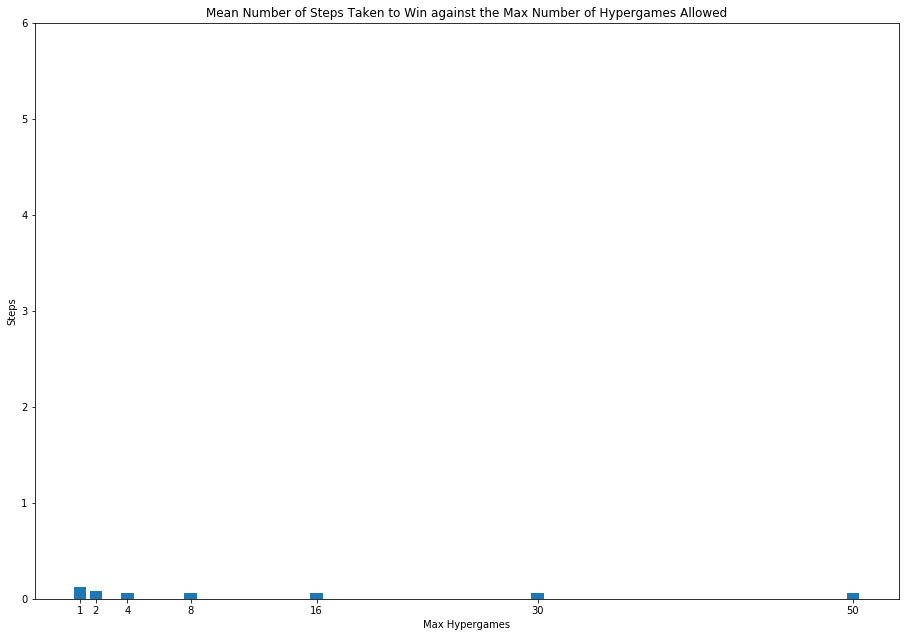

In [59]:
# Calculate the average number of steps taken to win for each hypergame
steps_to_win_list = list()
for idx, (move_list, game) in enumerate(zip(move_list_games, data)):
    game_steps_to_win_list = list()
    winning_games = game[((game['player_1_score'] == 100) & (game['player_2_score'] == 0))] 
    winning_games_list = winning_games['match_id'].tolist()
    for moves in move_list:
        if(moves['match_id'][0] in winning_games_list):
            move_length = len(moves['match_id'])
            game_steps_to_win_list.append(moves['step'][move_length - 1] + 1)
    steps_to_win_list.append(game_steps_to_win_list)

# Print steps to win
mean_steps_to_win = list()
median_steps_to_win = list()
for idx, game_steps_to_win in enumerate(steps_to_win_list):
    mean = statistics.mean(game_steps_to_win)
    print(f'{numHypergames_count[idx]} hypergames')
    print(f'\tMean steps to win: {mean}')
    print(f'\tMedian steps to win: {statistics.median(game_steps_to_win)}')
    mean_steps_to_win.append(mean)

# Graph steps to win
fig = plt.figure()
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Mean Number of Steps Taken to Win against the Max Number of Hypergames Allowed')
ax1.set_xlabel('Max Hypergames')
ax1.set_ylabel('Steps')
ax1.set_yscale('linear')
ax1.set_xticks(numHypergames_count)
ax1.set_yticks(range(0,10,1))
ax1.set_ylim([0,6])
ax1.bar(numHypergames_count, mean_steps_to_win)
plt.show()

### Move Results

Calculating the average move time per game.
This is expected to grow with the depth of the game and is expected to be different for the state update and the move selection.

In [19]:
class Tracker:
    '''
    Tracker tracks the average time for each move of each game played
    '''
    def __init__(self):
        self.time_sum = 0
        self.num_moves = 0
        self.times = list()
    
    def __str__(self):
        return "time_sum: " + str(self.time_sum) + " ms\n\tnum_moves: " + str(self.num_moves) + "\n\tmean_time: " + str(statistics.mean(self.times)) + "\n\tmedian_time: " + str(statistics.median(self.times)) + " ms\n\ttimes (ms): " + str(self.times)
    
    def addMove(self, num):
        self.time_sum += num
        self.num_moves+=1
        self.times.append(num)
    
    def getMeanTime(self):
        return statistics.mean(self.times)
    
    def getMedianTime(self):
        return statistics.median(self.times)

# Add the results for each move of each game played to a list of trackers for the update and select move times for the chosen player
time_to_update_list = list()
time_to_select_move_list = list()
for idx, (move_list, game) in enumerate(zip(move_list_games, data)):
    temp_time_to_update_list = list()
    temp_time_to_select_move_list = list()
    player_name = game['role_1'][0].upper()
    for move_set in move_list:
        for index, move_row in move_set.iterrows():
            if move_row['role_name'] == player_name:
                if move_row['step'] > len(temp_time_to_update_list) - 1:
                    temp_time_to_update_list.append(Tracker())
                    temp_time_to_select_move_list.append(Tracker())
                temp_time_to_update_list[move_row['step']].addMove(move_row['time_to_update'])
                temp_time_to_select_move_list[move_row['step']].addMove(move_row['time_to_select_move'])
    time_to_update_list.append(temp_time_to_update_list)
    time_to_select_move_list.append(temp_time_to_select_move_list)

# Print the data
for game_num, (game_time_to_update_list, game_time_to_select_move_list) in enumerate(zip(time_to_update_list, time_to_select_move_list)):
    print(str(numHypergames_count[game_num]) + ' hypergames')
    for idx, (update_step, select_step) in enumerate(zip(game_time_to_update_list, game_time_to_select_move_list)):
        print('\tStep: ' + str(idx) + "\n")
        print('\tTime taken to update states:')
        print('\t' + str(update_step)  + "\n")
        print('\tTime taken to select move:')
        print('\t' + str(select_step)  + "\n\n\n")

50 hypergames
	Step: 0

	Time taken to update states:
	time_sum: 18 ms
	num_moves: 49
	mean_time: 0.3673469387755102
	median_time: 0 ms
	times (ms): [0, 0, 0, 9, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 0, 4, 0, 0, 0, 5, 0, 0, 0, 0, 0, 0, 0]

	Time taken to select move:
	time_sum: 25871 ms
	num_moves: 49
	mean_time: 527.9795918367347
	median_time: 514 ms
	times (ms): [543, 632, 540, 505, 563, 510, 660, 514, 550, 486, 521, 500, 498, 522, 504, 487, 492, 554, 470, 530, 517, 459, 578, 512, 492, 490, 452, 518, 449, 473, 497, 491, 476, 502, 506, 469, 520, 518, 549, 720, 543, 476, 517, 830, 572, 552, 559, 551, 502]



	Step: 1

	Time taken to update states:
	time_sum: 1039 ms
	num_moves: 49
	mean_time: 21.20408163265306
	median_time: 19 ms
	times (ms): [19, 29, 29, 19, 29, 30, 29, 30, 30, 16, 15, 16, 22, 31, 30, 15, 15, 15, 22, 28, 21, 22, 16, 31, 15, 15, 31, 15, 16, 15, 15, 16, 16, 15, 15, 19, 20, 21, 19, 26, 19, 19, 19, 21, 34, 19, 21, 

Now I will graph the findings

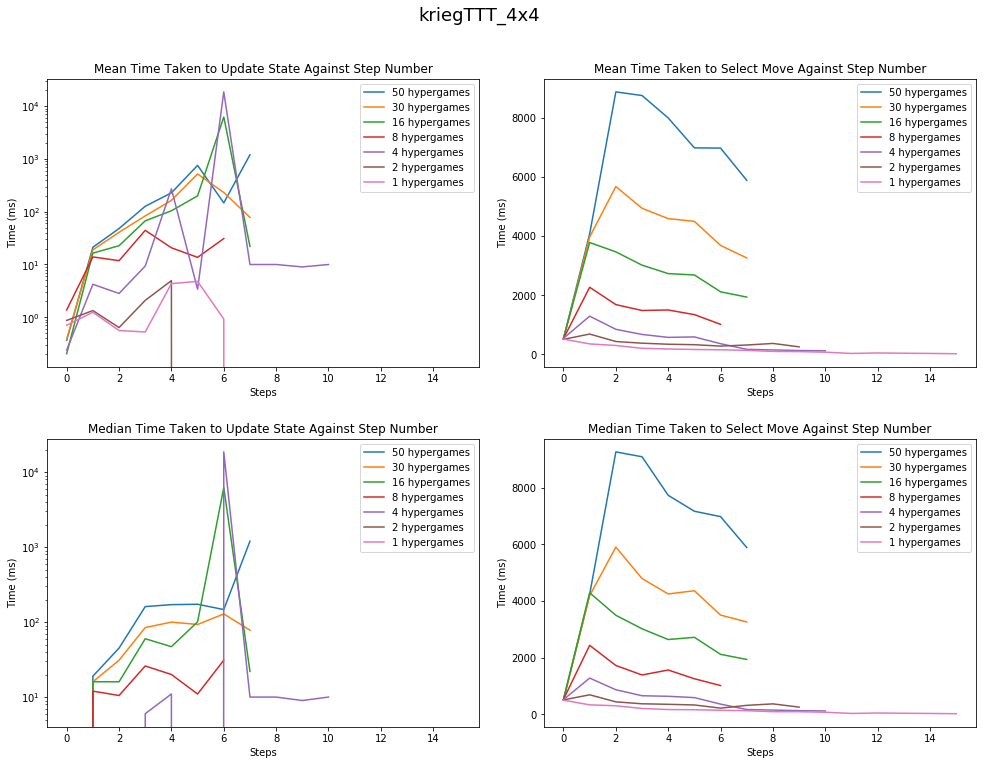

In [49]:
# Add the data to an array
mean_state_update_times = list()
mean_move_select_times = list()
median_state_update_times = list()
median_move_select_times = list()
for game_num, (game_time_to_update_list, game_time_to_select_move_list) in enumerate(zip(time_to_update_list, time_to_select_move_list)):
    temp_mean_state_update_times = list()
    temp_mean_move_select_times = list()
    temp_median_state_update_times = list()
    temp_median_move_select_times = list()
    for update_step, select_step in zip(game_time_to_update_list, game_time_to_select_move_list):
        temp_mean_state_update_times.append(update_step.getMeanTime())
        temp_mean_move_select_times.append(select_step.getMeanTime())
        temp_median_state_update_times.append(update_step.getMedianTime())
        temp_median_move_select_times.append(select_step.getMedianTime())
    mean_state_update_times.append(temp_mean_state_update_times)
    mean_move_select_times.append(temp_mean_move_select_times)
    median_state_update_times.append(temp_median_state_update_times)
    median_move_select_times.append(temp_median_move_select_times)

# Put into graphs
fig = plt.figure()
fig.suptitle(str(data[0]['game_name'][0]), x=1, y=2.5, fontsize=18)

# Draw mean graph for State Update
ax1 = fig.add_axes([0,1.25,1,1], label='state_update_mean')
ax1.set_title('Mean Time Taken to Update State Against Step Number')
ax1.set_xlabel('Steps')
ax1.set_ylabel('Time (ms)')
ax1.set_yscale('log')
for idx, game_mean_state_update_times in enumerate(mean_state_update_times):
    ax1.plot(game_mean_state_update_times, label=str(numHypergames_count[idx]) + ' hypergames')
ax1.legend()

# Draw mean graph for Move Select
ax2 = fig.add_axes([1.15,1.25,1,1], label='move_select_mean')
ax2.set_title('Mean Time Taken to Select Move Against Step Number')
ax2.set_xlabel('Steps')
ax2.set_ylabel('Time (ms)')
ax2.set_yscale('linear')
for idx, game_mean_move_select_times in enumerate(mean_move_select_times):
    ax2.plot(game_mean_move_select_times, label=str(numHypergames_count[idx]) + ' hypergames')
ax2.legend()

# Draw median graph for State Update
ax3 = fig.add_axes([0,0,1,1], label='state_update_median')
ax3.set_title('Median Time Taken to Update State Against Step Number')
ax3.set_xlabel('Steps')
ax3.set_ylabel('Time (ms)')
ax3.set_yscale('log')
for idx, game_median_state_update_times in enumerate(median_state_update_times):
    ax3.plot(game_median_state_update_times, label=str(numHypergames_count[idx]) + ' hypergames')
ax3.legend()

# Draw median graph for Move Select
ax4 = fig.add_axes([1.15,0,1,1], label='move_select_median')
ax4.set_title('Median Time Taken to Select Move Against Step Number')
ax4.set_xlabel('Steps')
ax4.set_ylabel('Time (ms)')
ax4.set_yscale('linear')
for idx, game_median_move_select_times in enumerate(median_move_select_times):
    ax4.plot(game_median_move_select_times, label=str(numHypergames_count[idx]) + ' hypergames')
ax4.legend()

plt.show()

By stratifying only based on the number of hypergames, the noise of the step numbers can be mitigated when they follow a similar trend.

This only seems reasonable to do for the time taken to select move and I will only consider the averages up to step 6 since beyond this the 8 hypergames results have no data.

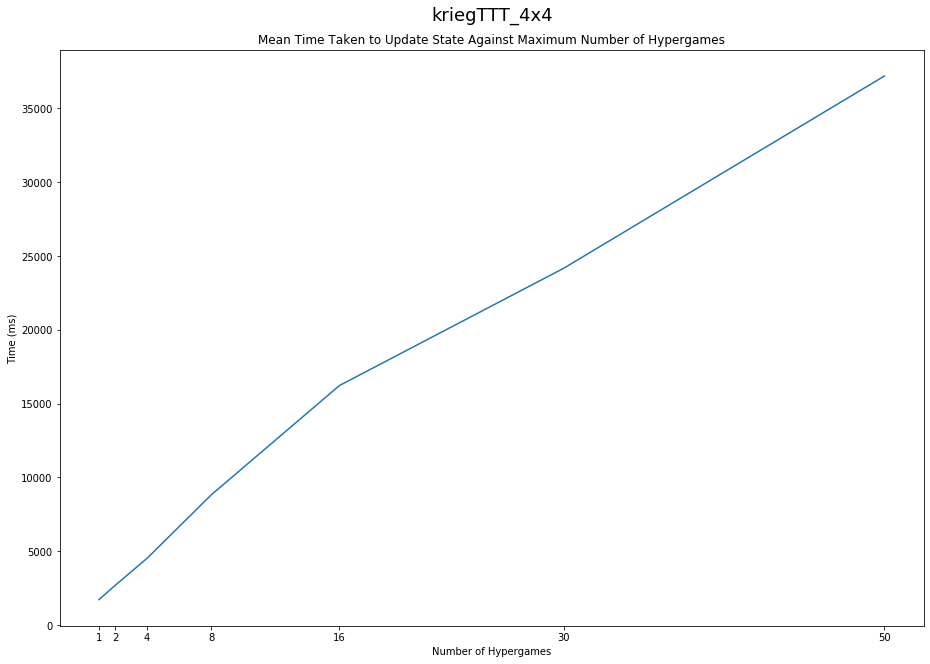

In [48]:
sum_game_mean_move_select_times = list()
for idx, game_mean_move_select_times in enumerate(mean_move_select_times):
    sum_game_mean_move_select_times.append(sum(game_mean_move_select_times[:6]))
    
# Put into graphs
fig = plt.figure()
fig.suptitle(str(data[0]['game_name'][0]), x=1, y=2.15, fontsize=18)

# Draw mean graph for State Update
ax1 = fig.add_axes([0,0,2,2])
ax1.set_title('Mean Time Taken to Update State Against Maximum Number of Hypergames')
ax1.set_xlabel('Number of Hypergames')
ax1.set_ylabel('Time (ms)')
ax1.set_yscale('linear')
ax1.set_xticks(numHypergames_count)
# ax1.set_ylim([0,50])
ax1.plot(numHypergames_count, sum_game_mean_move_select_times)

plt.show()
    
# sum_game_mean_move_select_times